In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
transform = transforms.ToTensor()

In [17]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [18]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [19]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
! pip install rdkit

Defaulting to user installation because normal site-packages is not writeable


In [21]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [83]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [65]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)


In [85]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [86]:
X_train.shape

torch.Size([1, 28, 28])

In [69]:
X_train.shape

torch.Size([1, 28, 28])

In [27]:
x = X_train.view(1, 1, 28, 28)


In [28]:
x = F.relu(conv1(x))

In [29]:
x.shape

torch.Size([1, 6, 26, 26])

In [30]:
x = F.max_pool2d(x, 2, 2)

In [31]:
x.shape

torch.Size([1, 6, 13, 13])

In [32]:
x = F.relu(conv2(x))


In [33]:
x.shape

torch.Size([1, 16, 11, 11])

In [34]:
x = F.max_pool2d(x, 2, 2)


In [35]:
x.shape

torch.Size([1, 16, 5, 5])

In [36]:
class convolutionalnetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)

In [37]:
torch.manual_seed(41)
model = convolutionalnetwork()
model


convolutionalnetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
for x, y in train_loader:
   break

In [51]:
x.shape, y.shape

(torch.Size([10, 1, 28, 28]), torch.Size([10]))

In [46]:
from sklearn.metrics import accuracy_score

In [44]:
import time

start_time = time.time()

epochs = 5  
train_losses = []   
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
     
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train) 
        
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
       
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)









current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')


epoch:  0  batch:  600 [  6000/60000]  loss: 0.02374847  accuracy:  97.517%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.02852385  accuracy:  97.575%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.00348869  accuracy:  97.622%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.00507018  accuracy:  97.588%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00069384  accuracy:  97.623%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.01455893  accuracy:  97.628%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.00101896  accuracy:  97.700%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.00529026  accuracy:  97.721%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00046367  accuracy:  97.774%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00058566  accuracy:  97.815%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.00071172  accuracy:  98.600%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.11706547  accuracy:  98.525%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.08495004  accuracy:  98.472%
epoch:  1  b

In [45]:
y_pred

tensor([[-3.2281e+01, -2.7332e+01, -2.8343e+01, -3.0655e+01, -1.3805e+01,
         -2.9542e+01, -4.2507e+01, -1.6131e+01, -2.0940e+01, -1.0729e-06],
        [-1.9030e+01, -1.0439e+01, -1.1187e+01, -1.3992e+01, -7.0601e+00,
         -1.8326e+01, -2.1350e+01, -2.7265e-03, -1.5557e+01, -6.3089e+00],
        [-2.1632e+01, -1.4861e+01, -1.6559e+01, -1.8515e+01, -1.5163e+01,
         -2.1831e+01, -3.4159e+01, -3.8147e-06, -1.8519e+01, -1.2681e+01],
        [-5.8086e+00, -1.9166e+01, -2.1424e+01, -2.6190e+01, -1.2941e+01,
         -1.9460e+01, -3.0086e-03, -2.6388e+01, -1.9695e+01, -1.8933e+01],
        [-3.0733e+01,  0.0000e+00, -2.6974e+01, -3.6846e+01, -2.0493e+01,
         -3.0369e+01, -2.4387e+01, -1.9215e+01, -1.7522e+01, -2.3392e+01],
        [-2.9502e+01, -1.1921e-07, -2.3747e+01, -3.2260e+01, -1.9910e+01,
         -2.5192e+01, -2.1179e+01, -1.7814e+01, -1.5820e+01, -2.0916e+01],
        [-2.6655e+01, -2.4876e+01, -2.3362e+01, -2.4221e+01, -1.2043e+01,
         -2.4040e+01, -3.4378e+0

In [34]:
predicted

tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [35]:
batch_corr

tensor(10)

In [32]:
train_correct

[tensor(56237), tensor(58787), tensor(59173), tensor(59306), tensor(59463)]

In [37]:
train_losses

[0.0005120981368236244,
 0.19886651635169983,
 0.24437639117240906,
 0.014015577733516693,
 0.002373412484303117]

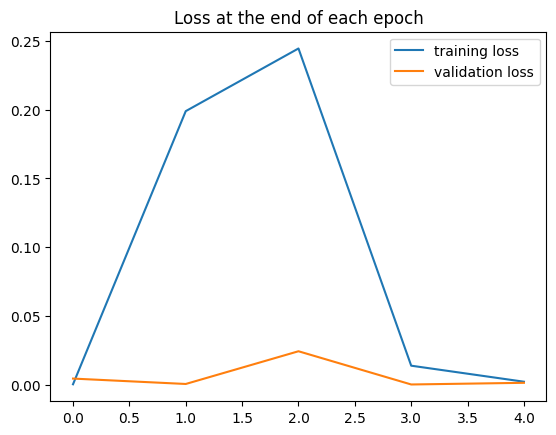

In [30]:
train_losses = [t.item() for t in train_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

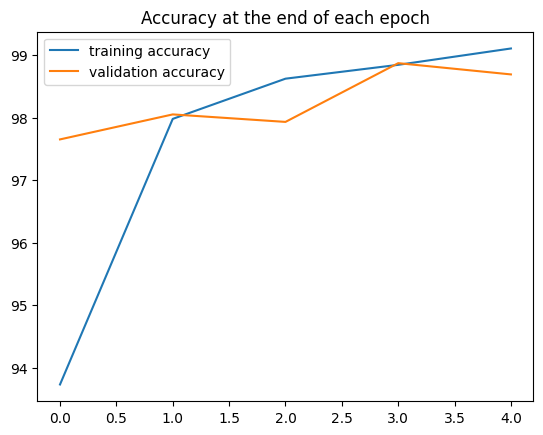

In [46]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [47]:
test_loader = DataLoader(test_data, batch_size=10000, shuffle=False)


In [48]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        

In [50]:
correct.item()

9869

In [51]:

test_data[4132] 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.4941, 0.9686, 

In [53]:
test_data[4132][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.4941, 0.9686, 0.1961, 0.0000,

In [54]:
test_data[4132][0].shape

torch.Size([1, 28, 28])

In [55]:
test_data[4132][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4941, 0.9686, 0.1961, 0.0000, 0.0000, 0.0000

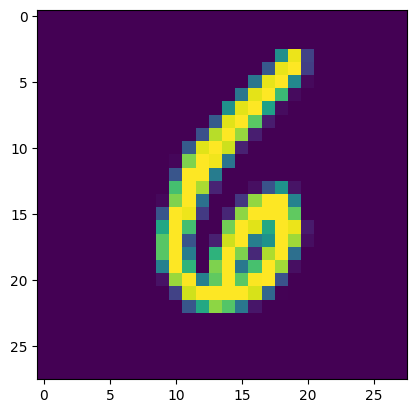

In [59]:
plt.imshow(test_data[4132][0].reshape(28,28))

In [60]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[4132][0].view(1,1,28,28)).argmax()


In [61]:
new_pred

tensor(6)

In [2]:
torch.cuda.is_available()

False

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'